In [19]:
import os
from dotenv import load_dotenv

# from datetime import datetime, timedelta
import pandas as pd
# import matplotlib.pyplot as plt

# from sklearn.metrics import mean_squared_error, r2_score
import hopsworks
import numpy as np
# from functions import util

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from utils import fng_labels_to_numbers_map


In [20]:
test_mode = True

In [21]:
load_dotenv()
os.environ["HOPSWORKS_API_KEY"] = os.getenv("HOPSWORKS_API_KEY")
project = hopsworks.login()

fs = project.get_feature_store() 

2024-12-28 13:06:47,059 INFO: Closing external client and cleaning up certificates.
Connection closed.
2024-12-28 13:06:47,063 INFO: Initializing external client
2024-12-28 13:06:47,065 INFO: Base URL: https://c.app.hopsworks.ai:443
2024-12-28 13:06:48,346 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1164448


In [22]:
solana_feature_group = fs.get_feature_group(
    name="solana",  
    version=1
)

# Step 3: Read the data from the feature group
solana_df = solana_feature_group.read().sort_values(by='timestamp', inplace=False).reset_index(drop=True)
# solana_df['open_diff'] = solana_df['open'].diff().fillna(0)
solana_df

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.80s) 


,timestamp,open,high,low,close,volume,volume_buy,volume_sell
0,1623888000,40.23,40.57,38.30,39.13,6007.618490,2885.660324,3121.958166
1,1623974400,39.13,39.36,35.00,36.62,13557.357196,7925.472309,5631.884887
2,1624060800,36.62,37.35,35.00,35.45,16986.163716,9258.361133,7727.802583
3,1624147200,35.45,35.89,31.48,35.28,38681.265775,21052.579774,17628.686001
4,1624233600,35.28,35.28,26.00,26.55,41903.613224,15380.745579,26522.867646
...,...,...,...,...,...,...,...,...
1286,1734998400,189.91,198.70,185.97,196.92,147273.311796,72402.790065,74870.521731
1287,1735084800,196.92,201.65,195.08,197.38,77888.393938,39038.188456,38850.205482
1288,1735171200,197.38,199.54,186.50,188.27,126419.530813,48442.972388,77976.558425
1289,1735257600,188.27,194.00,182.62,183.81,134928.650993,69516.047164,65412.603829


In [23]:
solana_df = solana_df[["timestamp","open"]]
solana_df

,timestamp,open
0,1623888000,40.23
1,1623974400,39.13
2,1624060800,36.62
3,1624147200,35.45
4,1624233600,35.28
...,...,...
1286,1734998400,189.91
1287,1735084800,196.92
1288,1735171200,197.38
1289,1735257600,188.27


In [24]:
# Step 2: Retrieve the feature group by name and version
bitcoin_feature_group = fs.get_feature_group(
    name="bitcoin",  
    version=1
)

# Step 3: Read the data from the feature group
bitcoin_df = bitcoin_feature_group.read().sort_values(by='timestamp', inplace=False).reset_index(drop=True)
# bitcoin_df['open_diff'] = bitcoin_df['open'].diff()
bitcoin_df = bitcoin_df[["timestamp","open"]]

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.85s) 


In [25]:
fs = project.get_feature_store(name='kth_lab1_2024_featurestore')
fng_feature_group = fs.get_feature_group('f_n_g_index', version=8)
fng_df = fng_feature_group.read()
fng_df['fng_classification'] = fng_df['fng_classification'].map(fng_labels_to_numbers_map)

fng_df


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.81s) 


,fng_value,fng_classification,timestamp
0,74,3,1.718410e+09
1,77,4,1.710720e+09
2,43,1,1.550189e+09
3,68,3,1.721952e+09
4,30,1,1.659571e+09
...,...,...,...
2514,38,1,1.528330e+09
2515,79,4,1.707782e+09
2516,28,1,1.542586e+09
2517,27,1,1.645747e+09


In [26]:

all_data = pd.merge(solana_df, bitcoin_df, how='inner', on="timestamp",suffixes=('_solana', '_bitcoin'))  
all_data = pd.merge(all_data, fng_df, how='inner', on="timestamp")

# target = all_data["open_solana"]
# all_data = all_data.drop(["open_solana"], axis=1, inplace=False)
all_data


,timestamp,open_solana,open_bitcoin,fng_value,fng_classification
0,1623888000,40.23,38337.1,26,1
1,1623974400,39.13,38078.2,25,0
2,1624060800,36.62,35824.0,23,0
3,1624147200,35.45,35490.5,21,0
4,1624233600,35.28,35595.0,23,0
...,...,...,...,...,...
1285,1734998400,189.91,94699.4,73,3
1286,1735084800,196.92,98647.2,73,3
1287,1735171200,197.38,99310.8,79,4
1288,1735257600,188.27,95645.0,74,3


In [27]:
if "timestamp" in all_data.columns:
    all_data = all_data.drop(columns=['timestamp'])

# Move 'open_solana' at the end
columns = [col for col in all_data.columns if col != 'open_solana'] 
columns.append('open_solana')  
all_data = all_data[columns] 
all_data_values = all_data.values


# X = all_data.drop(columns=['open_solana'])  # All features except the target
# y = all_data['open_solana'] 
all_data

,open_bitcoin,fng_value,fng_classification,open_solana
0,38337.1,26,1,40.23
1,38078.2,25,0,39.13
2,35824.0,23,0,36.62
3,35490.5,21,0,35.45
4,35595.0,23,0,35.28
...,...,...,...,...
1285,94699.4,73,3,189.91
1286,98647.2,73,3,196.92
1287,99310.8,79,4,197.38
1288,95645.0,74,3,188.27


In [28]:
# def create_featured_label(data, time_steps, num_predictions):
#     """
#         Creates an extra label that has the percentage change of the next num_predictions days.
#     """
#     percentage_change_label = []
    
#     for i in range(len(data) - time_steps-num_predictions):
#         first_label_row_index = i+time_steps
#         labels = data[first_label_row_index:first_label_row_index+num_predictions, -1]
#         first_price = labels[0]
#         labels = 100*(labels - first_price) / first_price
#         labels = [round(l,2) for l in labels]
#         percentage_change_label.append(labels)
#     return np.array(percentage_change_label)


def create_sequences(data, time_steps, num_predictions):
    X, y = [], []
    for i in range(len(data) - (time_steps+num_predictions)):
        first_label_row_index = i+time_steps
        row = data[i:first_label_row_index, :-1]
        
        X.append(row) 
        labels = data[first_label_row_index:first_label_row_index+num_predictions, -1]
        labels = [round(l,2) for l in labels]
        y.append(labels)
    return np.array(X), np.array(y)

In [29]:
time_steps = 30
num_predictions = 30
X, y = create_sequences(all_data_values, time_steps=time_steps, num_predictions=num_predictions)
# y_percentage_change = create_featured_label(all_data_values, time_steps=time_steps, num_predictions=num_predictions)


In [30]:
# def concatenate_labels(labels1, labels2):
#     y = []
#     for i in range(len(labels1)):
#         y.append(np.concatenate((labels1[i],labels2[i])))
#     return np.array(y)
# # y = concatenate_labels(y, y_percentage_change)

In [31]:
X.shape, y.shape

((1230, 30, 3), (1230, 30))

In [32]:
def train_val_test_split(X, labels, val_size=0.3, test_size=0.2):

    # Calculate split indices
    n_samples = X.shape[0]
    test_split_idx = int(n_samples * (1 - test_size))  
    val_split_idx = int(test_split_idx * (1 - val_size))  

    # Split X
    X_train = X[:val_split_idx] 
    X_val = X[val_split_idx:test_split_idx]  
    X_test = X[test_split_idx:]  #

    # labels
    labels_train = labels[:val_split_idx]
    labels_val = labels[val_split_idx:test_split_idx]
    labels_test = labels[test_split_idx:]


    return (X_train, X_val, X_test, labels_train, labels_val, labels_test)
(X_train, X_val, X_test, y_train, y_val, y_test ) = train_val_test_split(X, y)
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")
print(f"Labels1_train shape: {y_train.shape}, Labels1 val shape: {y_val.shape}, Labels1_test shape: {y_test.shape}")


X_train shape: (688, 30, 3), X_val shape: (296, 30, 3), X_test shape: (246, 30, 3)
Labels1_train shape: (688, 30), Labels1 val shape: (296, 30), Labels1_test shape: (246, 30)


In [33]:
scaler_features = MinMaxScaler(feature_range=(0, 1))

data_reshaped = X_train.reshape(-1, X_train.shape[2])  # Shape: (12680, 18)

data_scaled = scaler_features.fit_transform(data_reshaped)

X_train = data_scaled.reshape(X_train.shape)

# ************************************************

data_reshaped = X_val.reshape(-1, X_val.shape[2])  

data_scaled = scaler_features.transform(data_reshaped)

X_val = data_scaled.reshape(X_val.shape)

# *************************************************
data_reshaped = X_test.reshape(-1, X_test.shape[2]) 


data_scaled = scaler_features.transform(data_reshaped)

X_test = data_scaled.reshape(X_test.shape)



In [34]:
scaler_labels = MinMaxScaler(feature_range=(0, 1))
scaler_labels.fit(y_train)

y_train = scaler_labels.transform(y_train)
y_val = scaler_labels.transform(y_val)
y_test = scaler_labels.transform(y_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

In [36]:

model2 = Sequential()
model2.add(InputLayer((time_steps, X.shape[2])))
model2.add(LSTM(16, return_sequences=False))
model2.add(Dense(8, 'relu'))
model2.add(Dense(y.shape[1], 'linear'))
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 16)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           270 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,686 (6.59 KB)

 Trainable params: 1,686 (6.59 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
cp2 = ModelCheckpoint('model_30d_2/best_model.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [38]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((688, 30, 3), (688, 30), (296, 30, 3), (296, 30))

In [39]:

model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[cp2])

Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1247 - root_mean_squared_error: 0.3530 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2971
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1127 - root_mean_squared_error: 0.3355 - val_loss: 0.0857 - val_root_mean_squared_error: 0.2927
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1203 - root_mean_squared_error: 0.3465 - val_loss: 0.0835 - val_root_mean_squared_error: 0.2889
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1107 - root_mean_squared_error: 0.3324 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2857
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1104 - root_mean_squared_error: 0.3320 - val_loss: 0.0799 - val_root_mean_squared_error: 0.2827
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1016 - root_mean_squared_error: 0.3184 - val_loss: 0.0785 - val_root_mean_squared_error: 0.2802
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [40]:
train_predictions = model2.predict(X_train).flatten()
y_train_flattened = y_train.flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train_flattened})
train_results

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Train Predictions,Actuals
0,0.141829,0.066897
1,0.135753,0.068664
2,0.137482,0.069025
3,0.134112,0.059790
4,0.129362,0.055453
...,...,...
20635,0.054548,0.025538
20636,0.045157,0.033569
20637,0.058889,0.037062
20638,0.068510,0.036500


In [41]:
# from tensorflow.keras.models import load_model

# model1 = load_model('model2/best_model.keras')


### Evaluate on test set

#### Train with validation set


In [42]:
model2.fit(X_val, y_val, validation_data=(X_train, y_train), epochs=200, callbacks=[cp2])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 - root_mean_squared_error: 0.0864 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - root_mean_squared_error: 0.0837 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - root_mean_squared_error: 0.0733 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [43]:

val_predictions = model2.predict(X_val)


# test_predictions_unscaled =  scaler_labels.inverse_transform(test_predictions)
# y_test_unscaled = scaler_labels.inverse_transform(y_test)
# test_predictions_flattened = test_predictions_unscaled.flatten()
# y_test_flattened = y_test_unscaled.flatten()


test_predictions_flattened = val_predictions[:30].flatten()
y_test_flattened = y_val[:30].flatten()

test_results = pd.DataFrame(data={'Val Predictions':test_predictions_flattened, 'Actuals':y_test_flattened})

mse = mean_squared_error(y_test_flattened, test_predictions_flattened)
rmse = np.sqrt(mse)

res_dict = { 
        "validation set MSE": str(mse),
        "validation set R squared": str(rmse),
    }
# Print results
print(f"Val Mean Squared Error (MSE): {mse}")
print(f"Val Root Mean Squared Error (RMSE): {rmse}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Val Mean Squared Error (MSE): 0.00040464867066825056
Val Root Mean Squared Error (RMSE): 0.02011588105622646


In [44]:

test_predictions = model2.predict(X_test)


# test_predictions_unscaled =  scaler_labels.inverse_transform(test_predictions)
# y_test_unscaled = scaler_labels.inverse_transform(y_test)
# test_predictions_flattened = test_predictions_unscaled.flatten()
# y_test_flattened = y_test_unscaled.flatten()


test_predictions_flattened = test_predictions[:30].flatten()
y_test_flattened = y_test[:30].flatten()

test_results = pd.DataFrame(data={'Test Predictions':test_predictions_flattened, 'Actuals':y_test_flattened})

mse = mean_squared_error(y_test_flattened, test_predictions_flattened)
rmse = np.sqrt(mse)

res_dict = { 
        "test set MSE": str(mse),
        "test set R squared": str(rmse),
    }
# Print results
print(f"Test Mean Squared Error (MSE): {mse}")
print(f"Test Root Mean Squared Error (RMSE): {rmse}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Mean Squared Error (MSE): 0.006150007534837909
Test Root Mean Squared Error (RMSE): 0.07842198374714777


In [45]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(y_predicted_sample, y_actual_sample, num_predictions):
  df = pd.DataFrame(data={'Predictions': y_predicted_sample, 'Actuals':y_actual_sample})
  plt.plot(df['Predictions'][0:num_predictions])
  plt.plot(df['Actuals'][0:num_predictions])
  plt.show()

  return 

def predictions_table(y_predicted, y_actual, num_predictions):
  combined_array = np.column_stack((y_predicted, y_actual))
  
  results_price = pd.DataFrame(combined_array[:num_predictions], columns=['y_predicted_price','y_actual_price'])
  display(results_price)



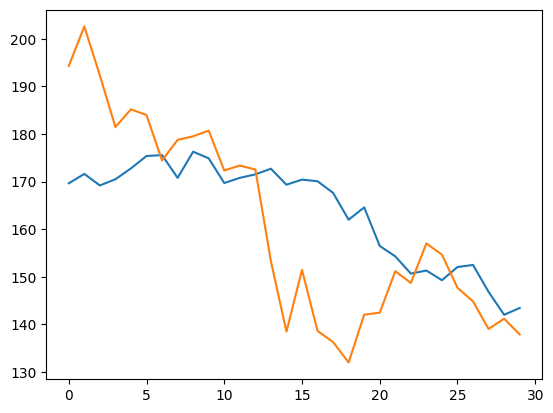

,y_predicted_price,y_actual_price
0,169.659271,194.30
1,171.624786,202.60
2,169.213242,192.32
3,170.506714,181.47
4,172.789474,185.20
5,175.391891,184.00
6,175.573044,174.45
7,170.806458,178.78
8,176.296570,179.53
9,174.899811,180.73


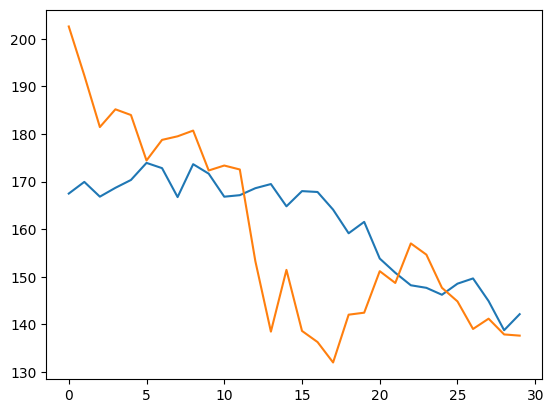

,y_predicted_price,y_actual_price
0,167.501831,202.60
1,169.952469,192.32
2,166.851227,181.47
3,168.708374,185.20
4,170.359131,184.00
5,173.943893,174.45
6,172.840805,178.78
7,166.761887,179.53
8,173.672501,180.73
9,171.680252,172.35


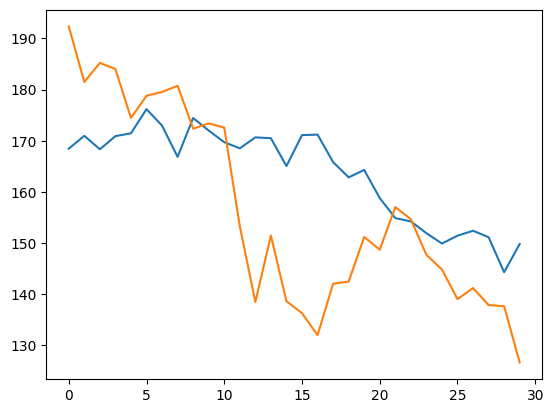

,y_predicted_price,y_actual_price
0,168.443832,192.32
1,170.960876,181.47
2,168.332291,185.20
3,170.897476,184.00
4,171.450211,174.45
5,176.168549,178.78
6,172.941513,179.53
7,166.843491,180.73
8,174.437973,172.35
9,171.986862,173.39


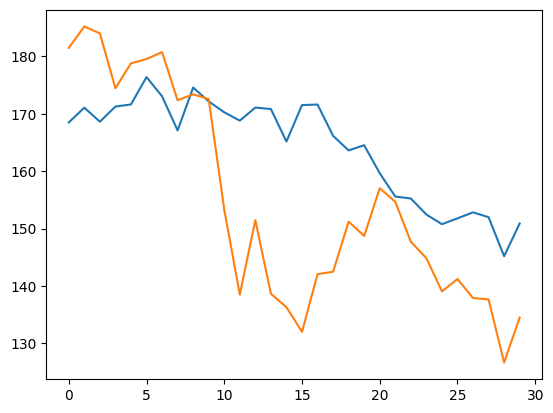

,y_predicted_price,y_actual_price
0,168.487427,181.47
1,171.064285,185.20
2,168.617004,184.00
3,171.256210,174.45
4,171.619522,178.78
5,176.391922,179.53
6,173.043350,180.73
7,167.094543,172.35
8,174.563629,173.39
9,172.156860,172.56


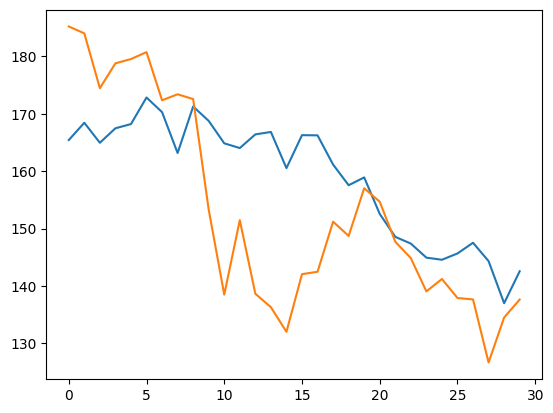

,y_predicted_price,y_actual_price
0,165.419998,185.20
1,168.431702,184.00
2,164.947006,174.45
3,167.468552,178.78
4,168.205017,179.53
5,172.831512,180.73
6,170.279984,172.35
7,163.163162,173.39
8,171.257599,172.56
9,168.754044,153.30


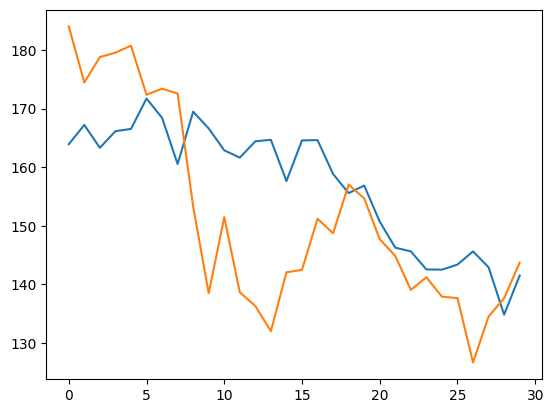

,y_predicted_price,y_actual_price
0,163.915314,184.00
1,167.201309,174.45
2,163.302231,178.78
3,166.137711,179.53
4,166.521484,180.73
5,171.701538,172.35
6,168.424896,173.39
7,160.542313,172.56
8,169.455078,153.30
9,166.607208,138.50


In [46]:
test_predictions_unscaled = scaler_labels.inverse_transform(test_predictions)
y_test_unscaled = scaler_labels.inverse_transform(y_test)
for i in [4, 5, 6,7,8,9]:  
    plot_predictions(test_predictions_unscaled[i], y_test_unscaled[i], num_predictions)
    predictions_table(test_predictions_unscaled[i], y_test_unscaled[i], num_predictions)

## Save model on registry

In [47]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

In [48]:
model_dir = "solana_price_model_30d/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
images_dir = model_dir + "/images"
if not os.path.exists(images_dir):
    os.mkdir(images_dir)

In [49]:
mr = project.get_model_registry()


# Creating input and output schemas using the 'Schema' class for features (X) and target variable (y)
input_schema = Schema(X_train)
output_schema = Schema(y_train)

# Creating a model schema using 'ModelSchema' with the input and output schemas
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

# Converting the model schema to a dictionary representation
schema_dict = model_schema.to_dict()


sample_indices = np.random.choice(X_test.shape[0], size=17, replace=False)
sample_test_values = X_test[sample_indices]


solana_model_1 = mr.python.create_model(
    name="solana_price_daily_model_30d", 
    metrics= res_dict,
    model_schema=model_schema,
    input_example=sample_test_values, 
    description="Solana daily price predictor. Predicts 30 days using solana lagged 10 timesteps, bitcoin lagged price (10) and fear greed index",
)

if not test_mode:
    model2.save(model_dir + "best_model.keras")
    solana_model_1.save(model_dir)

## Results

### Solana_price_daily_model_30d, v1:
    features: open_solana	open_bitcoin	fng_value	fng_classification
    Unormalized
    Mean Squared Error (MSE): 3052.8429657840406
    Root Mean Squared Error (RMSE): 55.25253809359386
    Normalized:
    Mean Squared Error (MSE): 0.04922278611417799
    Root Mean Squared Error (RMSE): 0.22186208805061308

Mean Squared Error (MSE): 0.04293666300390098
Root Mean Squared Error (RMSE): 0.20721163819607474


Mean Squared Error (MSE): 0.024526543138491817
Root Mean Squared Error (RMSE): 0.1566095244181905

